> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [18]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
df_s = pd.read_csv('source_data/csv/suicides0-14.csv')

In [6]:
df_s.shape

(75, 60)

In [7]:
df_s.head(8)

,Suicide 0-14 all age adj,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402384,0.379721,0.512450,0.576616,0.594624,0.648458,0.695720,0.617807,0.751746,NaN
1,Australia,0.282023,0.1629,0.0,0.100662,0.142596,0.044587,0.168712,0.116169,0.108778,...,0.397298,0.221465,0.194630,0.192489,0.333794,0.188775,NaN,0.164442,NaN,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,0.301751,0.255933,0.460640,0.461944,...,0.211056,0.558918,0.138358,0.273217,0.203178,0.134750,0.270398,0.068317,0.138712,0.283946
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.570722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.043669,1.066875,0.813270,1.127247,0.670717,NaN,NaN,NaN,0.758959,NaN
6,Belgium,NaN,NaN,NaN,NaN,0.235101,0.108734,0.171151,0.105720,0.250912,...,0.598794,NaN,NaN,NaN,NaN,0.467300,NaN,NaN,NaN,NaN
7,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# replace spaces with underscores and make lowercase
df_s.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [10]:
df_s.head()

,suicide_0-14_all_age_adj,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402384,0.379721,0.512450,0.576616,0.594624,0.648458,0.695720,0.617807,0.751746,NaN
1,Australia,0.282023,0.1629,0.0,0.100662,0.142596,0.044587,0.168712,0.116169,0.108778,...,0.397298,0.221465,0.194630,0.192489,0.333794,0.188775,NaN,0.164442,NaN,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,0.301751,0.255933,0.460640,0.461944,...,0.211056,0.558918,0.138358,0.273217,0.203178,0.134750,0.270398,0.068317,0.138712,0.283946
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.570722,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# rename country column in place
df_s.rename(columns={'suicide_0-14_all_age_adj': 'country'}, inplace=True)
df_s.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402384,0.379721,0.512450,0.576616,0.594624,0.648458,0.695720,0.617807,0.751746,NaN
1,Australia,0.282023,0.1629,0.0,0.100662,0.142596,0.044587,0.168712,0.116169,0.108778,...,0.397298,0.221465,0.194630,0.192489,0.333794,0.188775,NaN,0.164442,NaN,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,0.301751,0.255933,0.460640,0.461944,...,0.211056,0.558918,0.138358,0.273217,0.203178,0.134750,0.270398,0.068317,0.138712,0.283946
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.570722,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
canada_suicides = df_s.loc[df_s['country'] == 'Canada']

In [20]:
print(canada_suicides)

   country      1950      1951      1952      1953      1954     1955  \
10  Canada  0.088225  0.029249  0.111919  0.134195  0.102295  0.04865   

        1956      1957      1958  ...       1999      2000      2001  \
10  0.137556  0.043363  0.226682  ...   0.519018  0.737723  0.427206   

        2002      2003      2004  2005  2006  2007  2008  
10  0.546789  0.418587  0.434031   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]


In [29]:
canada_suicides.head()

,index,country,1950,1951,1952,1953,1954,1955,1956,1957,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,10,Canada,0.088225,0.029249,0.111919,0.134195,0.102295,0.04865,0.137556,0.043363,...,0.519018,0.737723,0.427206,0.546789,0.418587,0.434031,NaN,NaN,NaN,NaN


In [44]:
# drop index and country columns
cols = [0, 1]
foo = canada_suicides.drop(canada_suicides.columns[cols], axis=1, inplace=False)

In [45]:
foo.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,0.088225,0.029249,0.111919,0.134195,0.102295,0.04865,0.137556,0.043363,0.226682,0.098829,...,0.519018,0.737723,0.427206,0.546789,0.418587,0.434031,NaN,NaN,NaN,NaN


In [46]:
bar = foo.T

In [47]:
bar.head()

,0
1950,0.088225
1951,0.029249
1952,0.111919
1953,0.134195
1954,0.102295


In [54]:
bar.index.name = 'year'
bar.columns = ['value']

In [55]:
bar.head()

,value
year,
1950,0.088225
1951,0.029249
1952,0.111919
1953,0.134195
1954,0.102295


In [59]:
bar.tail()

,value
year,
2004,0.434031
2005,NaN
2006,NaN
2007,NaN
2008,NaN


In [60]:
# drop if any value in the row has a nan
bar.dropna(how='any', inplace = True);

In [61]:
bar.tail()

,value
year,
2000,0.737723
2001,0.427206
2002,0.546789
2003,0.418587
2004,0.434031


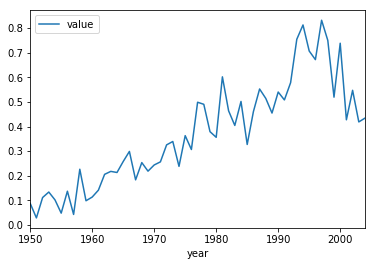

In [79]:
bar.plot(y='value', x='year', use_index=True);

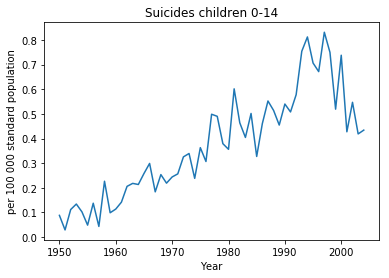

In [91]:
plt.plot(bar['year'], bar['value'])

plt.xlabel('Year')
plt.ylabel('per 100 000 standard population')
plt.title('Suicides children 0-14')

plt.show()

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!